In [1]:
# k - 평균 알고리즘 ( 군집화 )
# 나영채
# study / debug

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 데이터 세팅

In [4]:
#x|y|표준편차|갯수
def dset(x,y,s,n):
    data = np.array([np.random.normal(x, s, n),np.random.normal(y, s, n)])
#     data[0] = data[0]/np.max(data[0])
#     data[1] = data[1]/np.max(data[1])
    return data

In [5]:
a = dset(2, 8, 0.9, 200)
b = dset(5, 2, 0.9, 200)
c = dset(8, 8, 0.9, 200)
data = np.array([np.concatenate((a[0],b[0],c[0])), np.concatenate((a[1],b[1],c[1]))])
data_len = len(data[0])

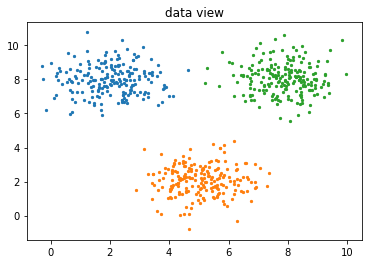

In [6]:
plt.scatter(a[0],a[1], s=5)
plt.scatter(b[0],b[1], s=5)
plt.scatter(c[0],c[1], s=5)
plt.title("data view")
plt.show()

In [7]:
# 스케일링

In [8]:
def scale(data):
    if(np.max(data)-np.min(data)==0): # x/0 에러 처리
        return (data-np.min(data))/(1.0/np.max(data))
    else:
        return (data-np.min(data))/(np.max(data)-np.min(data))

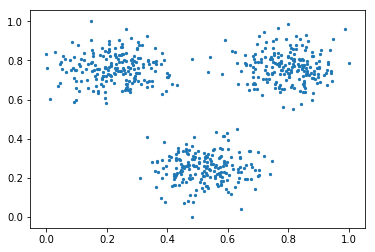

In [18]:
data = np.array([scale(np.concatenate((a[0],b[0],c[0]))), scale(np.concatenate((a[1],b[1],c[1])))])
plt.scatter(scale(data[0]), scale(data[1]), s=5)
plt.show()

In [10]:
# 파라미터

In [11]:
k = 3 
complete = 0.0001 

In [12]:
# 초기화

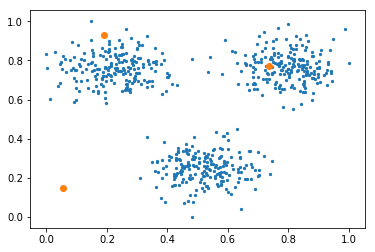

In [13]:
kp = np.random.rand(2,k) # 랜덤 지정

plt.scatter(data[0], data[1], s=5)
plt.scatter(kp[0], kp[1])
plt.show()

In [14]:
# 알고리즘

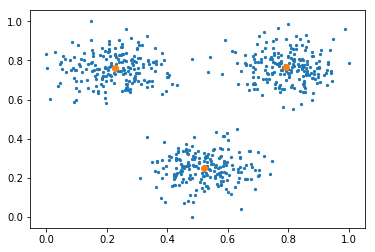

In [15]:
while True:
    distance = np.array([np.sqrt((kp[0,i]-data[0])**2+(kp[1,i]-data[1])**2) for i in range(k)])
    near_sum = np.zeros((2, k)) # 가장 가까운 수 더함
    near_num = np.zeros(k)      # 가장 가까운 점 갯수
    for i in range(data_len):
        n = np.argmin(distance.T[i]) # 거리가 좁은 배열번호 0~2
        near_num[n] += 1
        near_sum[0,n] += data[0,i]
        near_sum[1,n] += data[1,i]
    if np.sum((near_sum/near_num-kp)**2)<complete:
        break
    kp = near_sum/near_num
plt.scatter(data[0], data[1], s=5)
plt.scatter(kp[0], kp[1])
plt.show()

가장 가까운 군집 : 0 번


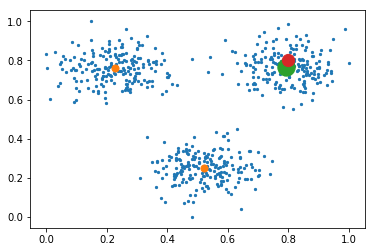

In [16]:
def qurey(x,y):
    return np.argmin([(kp.T[i,0]-x)**2 + (kp.T[i,1]-y)**2 for i in range(k)])

x = 0.8
y = 0.8
res = qurey(x, y)
print("가장 가까운 군집 :",res,"번")

plt.scatter(data[0], data[1], s=5)
plt.scatter(kp[0], kp[1], s=50)
plt.scatter(kp[0,res], kp[1,res], s=300)
plt.scatter(x,y,s=150)

plt.show()